In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mean_01 = np.array([0.1,0.2])
mean_02 = np.array([5.1,5.2])

print(mean_01)
print(mean_02)

[0.1 0.2]
[5.1 5.2]


In [3]:
cov_01 = np.array([[1.0,0.2],[0.2,1.1]])
cov_02 = np.array([[1.0,0.3],[0.3,1.1]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

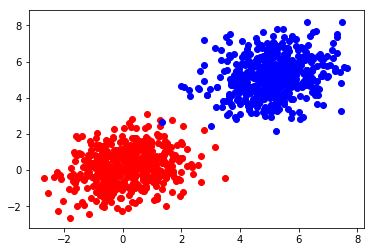

In [4]:
plt.scatter(dist_01[:,0],dist_01[:,1],c='r')
plt.scatter(dist_02[:,0],dist_02[:,1],c='b')

In [5]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows,cols))
print(data.shape)

data[:dist_01.shape[0],:dist_01.shape[1]] = dist_01
data[dist_01.shape[0]:,:dist_01.shape[1]] = dist_02
data[:dist_01.shape[0],-1] = 1

(1000, 3)


In [6]:
np.random.shuffle(data)

data[:10]

array([[ 6.6154235 ,  4.94470565,  0.        ],
       [ 1.39529946,  1.42924532,  1.        ],
       [ 4.1534194 ,  3.82269635,  0.        ],
       [ 0.90891417,  1.18173762,  1.        ],
       [ 1.28835129, -0.03252464,  1.        ],
       [ 5.48154031,  5.28211385,  0.        ],
       [ 6.24553393,  6.53302427,  0.        ],
       [-1.63995456, -0.71294618,  1.        ],
       [ 1.0133365 ,  1.05144803,  1.        ],
       [ 0.29649685, -1.22376536,  1.        ]])

In [7]:
split_factor = 0.75
split = int(data.shape[0] * split_factor)

X_train = data[:split,:-1]
X_test = data[split:,:-1]

y_train = data[:split,-1]
y_test = data[split:,-1]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 2)
(250, 2)
(750,)
(250,)


In [8]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [9]:
def hypothesis(x_sample,w,b):
    h = (x_sample * w).sum() + b
    return sigmoid(h)

In [10]:
def cost(x,y_true,w,b):
    err = 0
    m = x.shape[0]
    
    for i in range(m):
        if(y_true[i] == 1):
            err += -1 * (np.log(hypothesis(x[i],w,b)))
        else:
            err += -1 * (np.log(1 - hypothesis(x[i],w,b)))
    
    err = err/m
    return err

In [11]:
def get_gradient(x,y_true,w,b):
    
    w_grad = np.zeros(w.shape[0])
    b_grad = 0
    
    m = x.shape[0]
    
    for i in range(m):
        w_grad += (hypothesis(x[i],w,b) - y_true[i]) * x[i]
        b_grad += (hypothesis(x[i],w,b) - y_true[i])
    
    return [w_grad,b_grad]

In [12]:
def optimiser(x,y_true,w,b,learning_rate=0.0001):
    error = cost(x,y_true,w,b)
    
    w_grad,b_grad = get_gradient(x,y_true,w,b)
    
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    
    return [w,b,error]

In [13]:
def logistic_regression(X_train,y_train,nb_epoch=200,learning_rate=0.0001):
    loss = []
    
    W = np.random.rand(X_train.shape[1])
    b = np.random.rand()
    
    for i in range(nb_epoch):
        W,b,error = optimiser(X_train,y_train,W,b,learning_rate)
        loss.append(error)
    
    return [W,b,loss]

In [14]:
W,b,loss = logistic_regression(X_train,y_train)

In [15]:
print("W : {}".format(W))
print("b : {}".format(b))

W : [-0.5705414  -0.52816521]
b : 1.9143771547875275


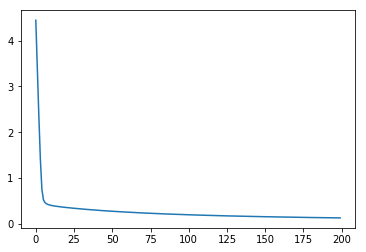

In [16]:
plt.plot(loss)